In [1]:
import sys
import os.path
#import pikepdf
#import urllib.request
import pandas as pd
import json
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [51]:
data = pd.read_csv("data/meta.csv")#header=None
data

,Identifier,Author,Keywords,Datum der Erstellung,Titel,Seitenzahl,Format,Dateigröße,Error
0,8I6sM5zapD60,NaN,NaN,2019/01/11,NaN,2.0,Hochformat,103901.0,NaN
1,8ZICOHBmAHyQ,NaN,NaN,2019/10/25,NaN,10.0,Hochformat,156446.0,NaN
2,3ztCv-WpxJ4U,NaN,NaN,NaN,NaN,3.0,Hochformat,76868.0,NaN
3,6mOhjfscZK2A,NaN,NaN,2019/10/07,NaN,8.0,Hochformat,179540.0,NaN
4,9pHMJT-hRLrQ,NaN,NaN,2022/01/04,NaN,5.0,Hochformat,398707.0,NaN
...,...,...,...,...,...,...,...,...,...
4890,37MxoszUOjDw,Susanne Kaiser,NaN,2022/02/28,NaN,64.0,Hochformat,898799.0,NaN
4891,8nQgLPwKyxec,NaN,NaN,2022/02/28,NaN,20.0,Hochformat,740116.0,NaN
4892,8wntomkrcr6g,NaN,NaN,2022/02/28,NaN,11.0,Hochformat,454073.0,NaN
4893,6kpMNOf2zVq4,NaN,NaN,2022/02/28,Saskia_Dübener-Lehrermanual-MIT_App_Inventor,20.0,Hochformat,3576661.0,NaN


### Hier folgen statistische Auswertungen aus dem gewonnenen Daten der ersten Phase

In [52]:
keyword_statistics=data.groupby(['Keywords'])["Keywords"]\
                                       .count() \
                                       .reset_index(name='count') \
                                       .sort_values(['count'], ascending=False, ignore_index=True)

keyword_statistics.to_csv("data/metaauswertungkeywords.csv", index=False)
keyword_statistics

,Keywords,count
0,"Machine_Learning,Optimization",55
1,"Notizen,Whiteboard,Whiteboard-Seite,Notebook_s...",19
2,"""Bremsen,Bremstechnik,Druckluftbremse,Klotzbre...",10
3,"Farbe,Farben,Farbräume,Farbraum,Farbmodelle,Fa...",8
4,"Garten,Profi,Gartenbau",8
...,...,...
144,"Fahrdynamik,Leistungsbedarf_zur_Überwindung_vo...",1
145,"Fahrdynamik,Leistungsbedarf_zur_Überwindung_de...",1
146,"Fahrdynamik,Leistungsbedarf,fahrdynamische_Aus...",1
147,"Fahrdynamik,Fahrzeitermittlung",1


In [4]:
data["Keywords"].count()

295

In [5]:
error_statistics = data.groupby(['Error'])["Error"]\
                                       .count() \
                                       .reset_index(name='count') \
                                       .sort_values(['count'], ascending=False, ignore_index=True)

error_statistics

,Error,count
0,Missing(404),646
1,PasswordProtected,20
2,OpeningError,7


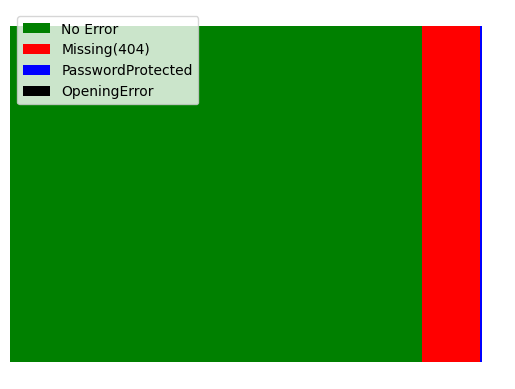

In [6]:
error_list = error_statistics['count'].tolist()
error_list.insert(0, len(data)-error_statistics['count'].sum())

error_name = error_statistics['Error'].tolist()
error_name.insert(0, 'No Error')

colors = ['green', 'red', 'blue', 'black', 'orange', 'violet']

y_offset=0
for error in range(len(error_list)):
    plt.barh(y= 0, 
             width = error_list[error], 
             left = y_offset, 
             color = colors[error],
             label = error_name[error])
    
    y_offset = y_offset + error_list[error]
plt.axis('off')
plt.legend(loc='upper left')

[Text(0, 0, '646'), Text(0, 0, '20'), Text(0, 0, '7')]

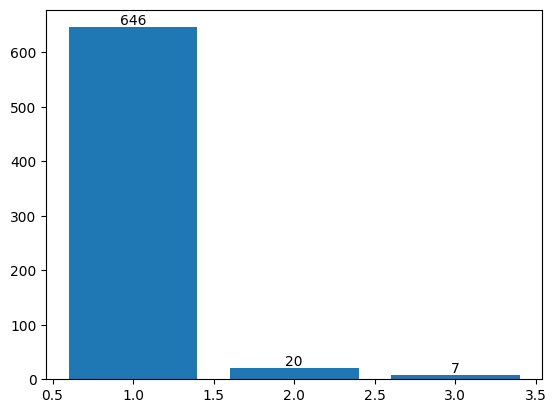

In [7]:
plt.bar_label(plt.bar(x= (1,2,3), height=error_statistics['count']), label=error_statistics['Error'])

In [8]:
author_statistics = data.groupby(['Author'])["Author"]\
                                       .count() \
                                       .reset_index(name='count') \
                                       .sort_values(['count'], ascending=False, ignore_index=True)
                                       
                                       
#author_statistics.to_csv("temp/metaauswertungauthor.csv", index=False)
author_statistics.head()

,Author,count
0,Peter Kiessling,259
1,Jürgen Sachse,86
2,Prof. Dr.-Ing. Henning Zeidler,72
3,Prof. Hacker,60
4,Peter Kießling,59


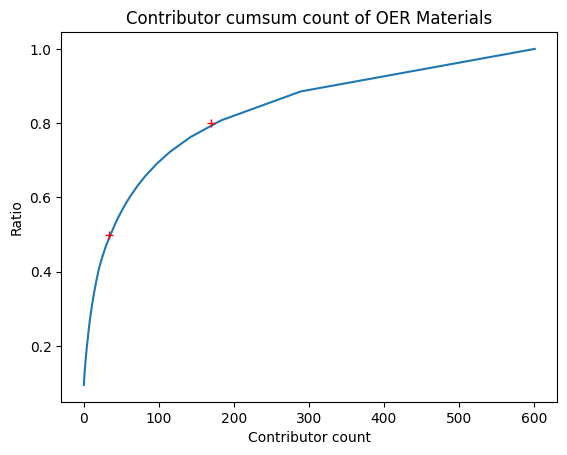

In [9]:
cumsum_statistics = author_statistics.cumsum()
cumsum_statistics["ratio"] = cumsum_statistics["count"] / cumsum_statistics["count"].max()

ax = cumsum_statistics.ratio.plot()
ax.set_title("Contributor cumsum count of OER Materials")
ax.set_xlabel("Contributor count")
ax.set_ylabel("Ratio")

plt.plot([34],[0.5], "+r")
plt.plot([169],[0.8], "+r")

In [11]:

timedata = pd.DataFrame(data['Datum der Erstellung'])
timedata.dropna(inplace=True)
timelist=list()

for index, row in timedata.iterrows():
    #print(row['Datum der Erstellung'])
    timelist.append(datetime.strptime(row['Datum der Erstellung'],"%Y/%m/%d"))
timedata = timedata.assign(datetime=timelist)
#df1 = df1.assign(e=pd.Series(np.random.randn(sLength)).values)
    #timelist.append(row.strftime(%x))
timedata.drop(columns='Datum der Erstellung', inplace=True)   
    
dailytime_statistics = timedata.groupby(['datetime'])["datetime"]\
                                       .count() \
                                       .reset_index(name='count') \
                                       .sort_values(['datetime'], ascending=False, ignore_index=True)

#time_statistics.to_csv("temp/metaauswertungtime.csv", index=False)
dailytime_statistics

,datetime,count
0,2022-06-26,3
1,2022-06-22,1
2,2022-06-17,1
3,2022-06-13,2
4,2022-05-24,2
...,...,...
1082,2001-07-05,1
1083,1999-10-21,1
1084,1999-02-16,1
1085,1998-07-10,2


<AxesSubplot:xlabel='datetime'>

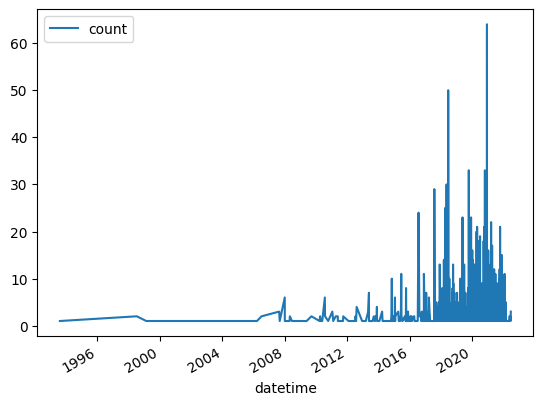

In [12]:
dailytime_statistics.set_index(['datetime'],inplace=True)
dailytime_statistics.plot()

<AxesSubplot:xlabel='datetime'>

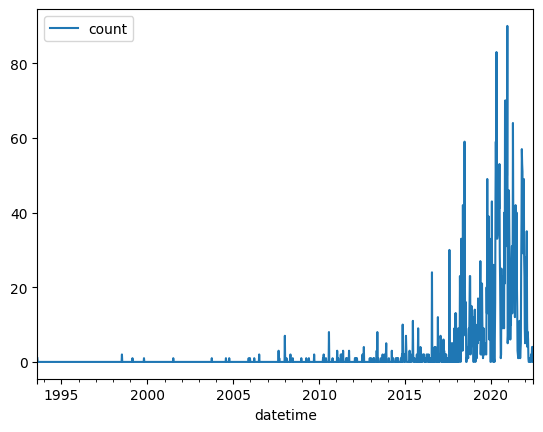

In [13]:
weeklytime_statistics = timedata.resample('W', on='datetime').count() #hier Buchstaben verändern für andere Zeitspannen

weeklytime_statistics.rename(columns={list(weeklytime_statistics)[0]:'count'}, inplace=True)
weeklytime_statistics.plot()

In [14]:
page_statistics = data.groupby(['Seitenzahl'])["Seitenzahl"]\
                                       .count() \
                                       .reset_index(name='count') \
                                       .sort_values(['Seitenzahl'], ascending=True, ignore_index=True)
page_statistics

,Seitenzahl,count
0,1.0,816
1,2.0,459
2,3.0,242
3,4.0,168
4,5.0,168
...,...,...
169,591.0,3
170,623.0,2
171,857.0,2
172,1018.0,1


<AxesSubplot:xlabel='Seitenzahl'>

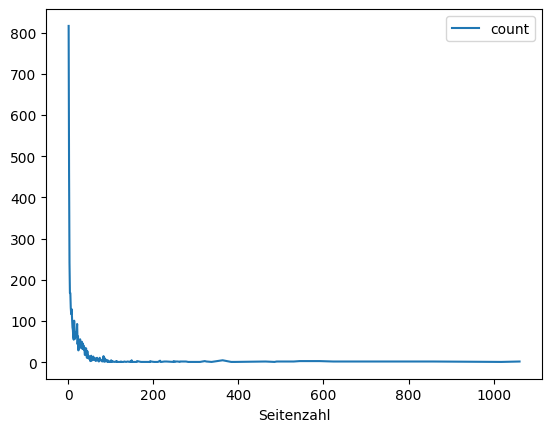

In [15]:
page_statistics.set_index(['Seitenzahl'],inplace=True)
page_statistics.plot()

In [16]:
format_statistics = data.groupby(['Format'])["Format"]\
                                       .count() \
                                       .reset_index(name='count') \
                                       .sort_values(['count'], ascending=False, ignore_index=True)
format_statistics

,Format,count
0,Hochformat,2682
1,Querformat,1887


<AxesSubplot:xlabel='Format'>

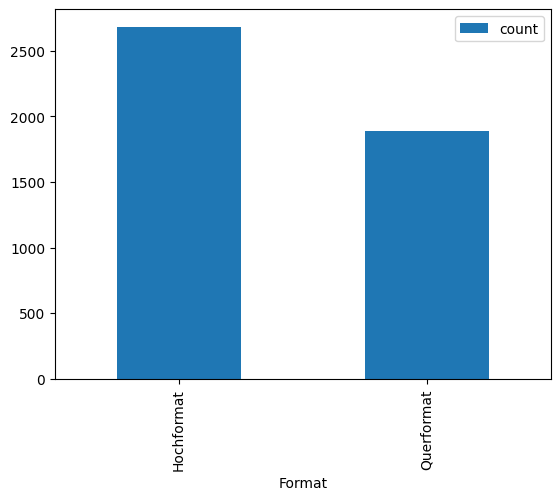

In [17]:
format_statistics.plot(kind='bar', x='Format')

In [21]:
#Dateigröße
sizedata = pd.DataFrame(data['Dateigröße'])
sizedata.dropna(inplace=True)

#sizelist = list()

#for index, row in sizedata.iterrows():
#    sizesplitter = row['Dateigröße'].split(" ", 1)
#    if sizesplitter[1] == "GB":
#        sizelist.append(float(sizesplitter[0]) * 1000000000)
#    elif sizesplitter[1] == "MB":
#        sizelist.append(float(sizesplitter[0]) * 1000000)
#    elif sizesplitter[1] == "kB":
#        sizelist.append(float(sizesplitter[0]) * 1000)
#    else:
#        sizelist.append(float(sizesplitter[0]))

#sizelist
#sizedata = sizedata.assign(size=sizelist)


#df1 = df1.assign(e=pd.Series(np.random.randn(sLength)).values)
    #timelist.append(row.strftime(%x))

size_statistics = sizedata.groupby(['Dateigröße'])["Dateigröße"]\
                                       .count() \
                                       .reset_index(name='count') \
                                       .sort_values(['Dateigröße'], ascending=True, ignore_index=True)
size_statistics

,Dateigröße,count
0,6028.0,1
1,6135.0,1
2,6343.0,1
3,7012.0,1
4,7639.0,1
...,...,...
3752,122738171.0,1
3753,177360802.0,1
3754,198529321.0,1
3755,203312639.0,1


<AxesSubplot:xlabel='Dateigröße'>

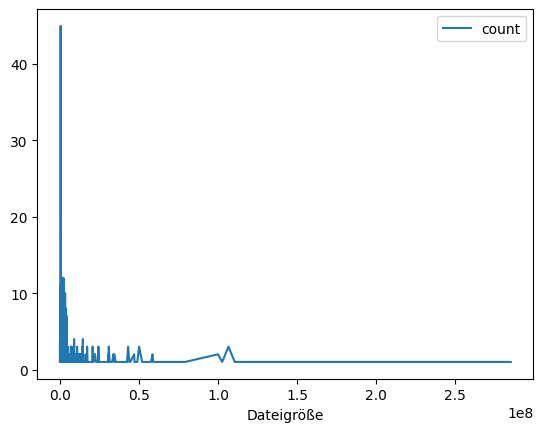

In [23]:
size_statistics.set_index(['Dateigröße'],inplace=True)
size_statistics.plot()

### Hier werden die aggregierten Daten aus der ersten Phase zu den Daten aus content.json geschrieben

In [24]:
with open("data/content.json", 'r', encoding='utf-8') as json_data:
    raw_data = json.load(json_data)
    
    
oer_data_set = list()

contdata = raw_data['files']
for entry in contdata:
    oer_data_set.append(entry)

In [25]:
content = pd.DataFrame(oer_data_set)
content

,filename,license,oer_permalink,title,comment,creator,publisher,source,city,publicationMonth,...,act,appId,category,chapter,duration,mediaType,nav1,nav2,nav3,series
0,SC_Hardware.png,CC BY 4.0 Int.,https://bildungsportal.sachsen.de/opal/oer/6TI...,Hardware zum Styroporschneiden,,Daniela Dobeleit,SLUB Dresden,,,,...,,,,,,,,,,
1,beleg.pdf,CC BY-SA 4.0 Int.,https://bildungsportal.sachsen.de/opal/oer/8I6...,,,,,,,,...,,,,,,,,,,
2,Bereich III.pdf,CC BY-NC-ND 4.0 Int.,https://bildungsportal.sachsen.de/opal/oer/8ZI...,,,,,,,,...,,,,,,,,,,
3,uebung6_A2d.py,CC0 1.0 Universell,https://bildungsportal.sachsen.de/opal/oer/6fn...,,,,,,,,...,,,,,,,,,,
4,ITM_Selbststudium_1.docx,CC BY-NC-SA 4.0 Int.,https://bildungsportal.sachsen.de/opal/oer/7Bm...,,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11317,statistik_054.mkv,CC BY-NC-ND 4.0 Int.,https://bildungsportal.sachsen.de/opal/oer/6Qd...,,,,,,,,...,,,,,,,,,,
11318,statistik_071.mkv,CC BY-NC-ND 4.0 Int.,https://bildungsportal.sachsen.de/opal/oer/6SX...,,,,,,,,...,,,,,,,,,,
11319,statistik_058.mkv,CC BY-NC-ND 4.0 Int.,https://bildungsportal.sachsen.de/opal/oer/6G7...,,,,,,,,...,,,,,,,,,,
11320,Cast-Filius Installation von Programmen auf de...,CC BY-NC 4.0 Int.,https://bildungsportal.sachsen.de/opal/oer/10l...,,,,,,,,...,,,,,,,,,,


In [26]:
data['oer_permalink'] = 'https://bildungsportal.sachsen.de/opal/oer/' + data['Identifier']

fusion = pd.merge(content, data, on='oer_permalink', how='inner') #for whole content:  how='left' 
fusion

,filename,license,oer_permalink,title,comment,creator,publisher,source,city,publicationMonth,...,series,Identifier,Author,Keywords,Datum der Erstellung,Titel,Seitenzahl,Format,Dateigröße,Error
0,beleg.pdf,CC BY-SA 4.0 Int.,https://bildungsportal.sachsen.de/opal/oer/8I6...,,,,,,,,...,,8I6sM5zapD60,NaN,NaN,2019/01/11,NaN,2.0,Hochformat,103901.0,NaN
1,Bereich III.pdf,CC BY-NC-ND 4.0 Int.,https://bildungsportal.sachsen.de/opal/oer/8ZI...,,,,,,,,...,,8ZICOHBmAHyQ,NaN,NaN,2019/10/25,NaN,10.0,Hochformat,156446.0,NaN
2,000 Prüfungsleistungen Engemaier.pdf,CC BY-SA 4.0 Int.,https://bildungsportal.sachsen.de/opal/oer/3zt...,,,,,,,,...,,3ztCv-WpxJ4U,NaN,NaN,NaN,NaN,3.0,Hochformat,76868.0,NaN
3,Bereich I.pdf,CC BY-NC-ND 4.0 Int.,https://bildungsportal.sachsen.de/opal/oer/6mO...,,,,,,,,...,,6mOhjfscZK2A,NaN,NaN,2019/10/07,NaN,8.0,Hochformat,179540.0,NaN
4,BauingenieureSemester1_Woche11.pdf,CC BY-NC-ND 4.0 Int.,https://bildungsportal.sachsen.de/opal/oer/9pH...,,,,,,,,...,,9pHMJT-hRLrQ,NaN,NaN,2022/01/04,NaN,5.0,Hochformat,398707.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237,Fertiges Protokoll.pdf,CC BY 4.0 Int.,https://bildungsportal.sachsen.de/opal/oer/37M...,,,,,,,,...,,37MxoszUOjDw,Susanne Kaiser,NaN,2022/02/28,NaN,64.0,Hochformat,898799.0,NaN
5238,Instahub-Lehrerhandbuch-Job-Thore.pdf,CC BY-ND 4.0 Int.,https://bildungsportal.sachsen.de/opal/oer/8nQ...,,,,,,,,...,,8nQgLPwKyxec,NaN,NaN,2022/02/28,NaN,20.0,Hochformat,740116.0,NaN
5239,Instahub-Schülerhandbuch-Job-Thore.pdf,CC BY-ND 4.0 Int.,https://bildungsportal.sachsen.de/opal/oer/8wn...,,,,,,,,...,,8wntomkrcr6g,NaN,NaN,2022/02/28,NaN,11.0,Hochformat,454073.0,NaN
5240,Lehrermanual-MIT_App_Inventor-Dübener-Saskia.pdf,CC BY 4.0 Int.,https://bildungsportal.sachsen.de/opal/oer/6kp...,,,,,,,,...,,6kpMNOf2zVq4,NaN,NaN,2022/02/28,Saskia_Dübener-Lehrermanual-MIT_App_Inventor,20.0,Hochformat,3576661.0,NaN


In [37]:
#TODO delete Errors
fusion = fusion[(fusion['Error'].isnull())]

maxsize = len(fusion)
licenseprev = len(fusion[((fusion['license'].notna()) & (fusion['license'] != ''))])
titleprev = len(fusion[((fusion['title'].notna()) & (fusion['title'] != ''))])
titlenow = len(fusion[((fusion['title'].notna()) & (fusion['title'] != '')) | ((fusion['Titel'].notna()) & (fusion['Titel'] != ''))])
creatorprev = len(fusion[((fusion['creator'].notna()) & (fusion['creator'] != ''))])
creatornow =len(fusion[((fusion['creator'].notna()) & (fusion['creator'] != '')) | ((fusion['Author'].notna()) & (fusion['Author'] != ''))])
pagesprev = len(fusion[((fusion['pages'].notna()) & (fusion['pages'] != ''))])
pagesnow = len(fusion[((fusion['pages'].notna()) & (fusion['pages'] != '')) | ((fusion['Seitenzahl'].notna()) & (fusion['Seitenzahl'] != ''))])
languageprev = len(fusion[((fusion['language'].notna()) & (fusion['language'] != ''))])
keywordsprev = 0 #TODO what from content masps to keywords
keywordsnow = len(fusion[((fusion['Keywords'].notna()) & (fusion['Keywords'] != ''))])
#keywords

columns = ('License', 'Title', 'Creator', 'Pages', 'Language', 'Keywords')
ind =[0.2, 0.65, 1.1, 1.55, 2, 2.45]

<BarContainer object of 6 artists>

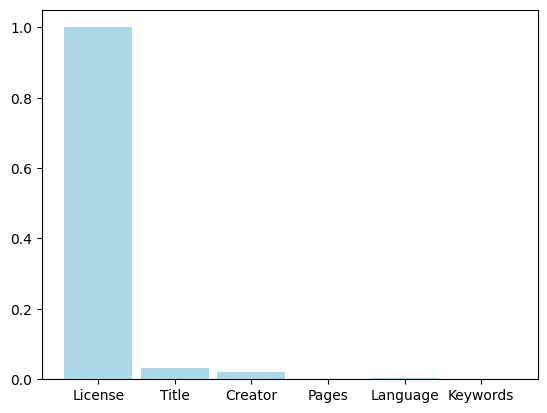

In [38]:
#Graph w/o meta.csv

plt.bar(x = ind, 
        height = [licenseprev/maxsize, titleprev/maxsize, creatorprev/maxsize, pagesprev/maxsize, languageprev/maxsize, keywordsprev/maxsize], 
        color ='lightblue',
        width = 0.4,
        tick_label = columns)

<BarContainer object of 6 artists>

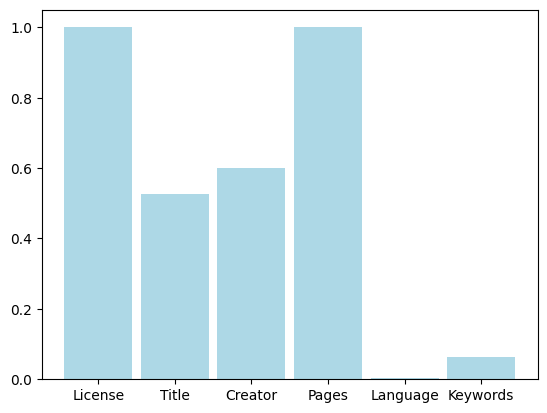

In [39]:
#Graph with meta.csv
plt.bar(x = ind, 
        height = [licenseprev/maxsize, titlenow/maxsize, creatornow/maxsize, pagesnow/maxsize, languageprev/maxsize, keywordsnow/maxsize], 
        color ='lightblue',
        width = 0.4,
        tick_label = columns)

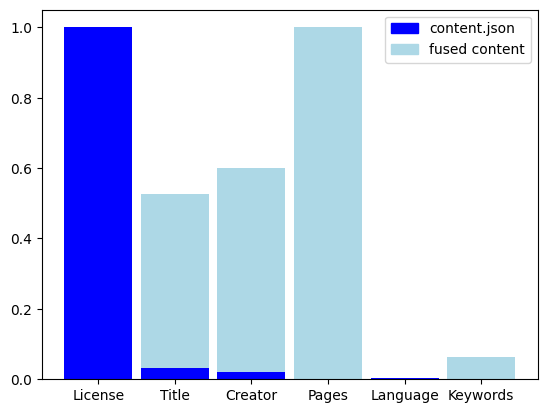

In [40]:
plt.bar(x = ind, 
        height = [licenseprev/maxsize, titlenow/maxsize, creatornow/maxsize, pagesnow/maxsize, languageprev/maxsize, keywordsnow/maxsize], 
        color ='lightblue',
        width = 0.4,
        tick_label = columns)
plt.bar(x = ind, 
        height = [licenseprev/maxsize, titleprev/maxsize, creatorprev/maxsize, pagesprev/maxsize, languageprev/maxsize, keywordsprev/maxsize], 
        color ='blue',
        width = 0.4,
        tick_label = columns)

content_label = mpatches.Patch(color='blue', label='content.json')
fusion_label = mpatches.Patch(color='lightblue', label='fused content')
plt.legend(handles=[content_label, fusion_label])


In [ ]:
keyworddf = content['nav3'].replace('', np.nan)
keyworddf.dropna()

In [ ]:
fusion.at[4466, 'Titel']

In [ ]:
pagesnow+error_statistics['count'].sum()

In [44]:
#145_4SbFnNyGo

fusion[(fusion['Identifier'] == '145_4SbFnNyGo')]

,filename,license,oer_permalink,title,comment,creator,publisher,source,city,publicationMonth,...,series,Identifier,Author,Keywords,Datum der Erstellung,Titel,Seitenzahl,Format,Dateigröße,Error
293,Uebung5_Haenicke_Philipp.pdf,CC BY-NC-ND 4.0 Int.,https://bildungsportal.sachsen.de/opal/oer/145...,,,,,,,,...,,145_4SbFnNyGo,NaN,Geben Sie hier Suchbegriffe für \rz.B. Spotlig...,2020/07/06,NaN,5.0,Hochformat,8182967.0,NaN


In [45]:
fusion.at[293, 'Keywords']

'Geben Sie hier Suchbegriffe für \rz.B. Spotlight ein, die über die Dateisuche \rgefunden werden können'